# **Machine Learning Modelling**

# **1. Dependent Variables**

Since the dependent variables have a high corr with global sales. We decide to do a simple regression to see which region is better at predicting global sales.

Initial data cleaning to prepare for model

In [18]:
predictors = ["JP_Sales", "NA_Sales", "EU_Sales", "Other_Sales", "Global_Sales"]
cleaned_data = null_cleaning(data, predictors)
sales = pd.DataFrame(cleaned_data["Global_Sales"])

Regression model and plotting the results

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Intercept of Regression 	: b =  [0.30562796]
Coefficients of Regression 	: a =  [[2.91876062]]

For predictor JP_Sales:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.40507480820575203
Mean Squared Error (MSE) 	: 1.2064465357551566

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.31994597846622364
Mean Squared Error (MSE) 	: 2.379970596528031

Intercept of Regression 	: b =  [0.28344936]
Coefficients of Regression 	: a =  [[5.20583676]]

For predictor Other_Sales:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.45631692220240727
Mean Squared Error (MSE) 	: 1.102532847498674

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7035894720242046
Mean Squared Error (MSE) 	: 1.0373416210269475

Intercept of Regression 	: b =  [0.07818658]
Coefficients of Regression 	: a =  [[1.7185844]]

For predictor NA_Sales:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.860457025897511
Mean Squared 

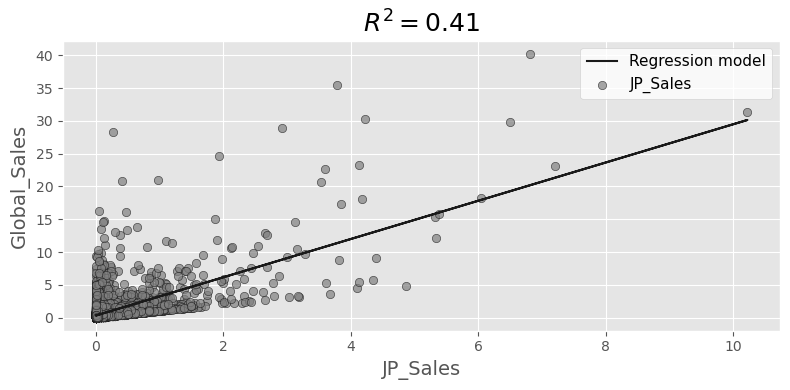

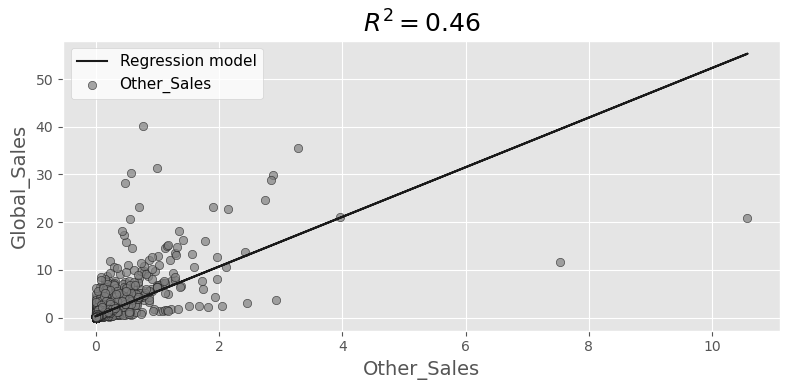

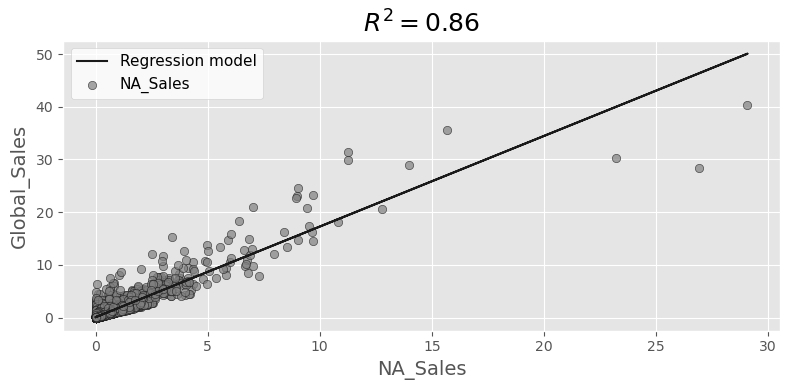

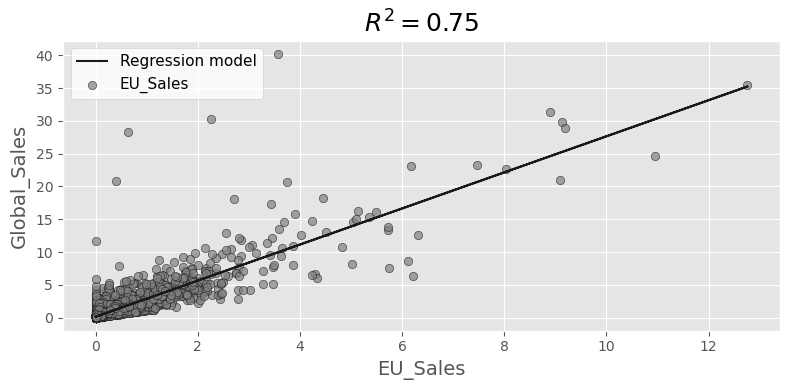

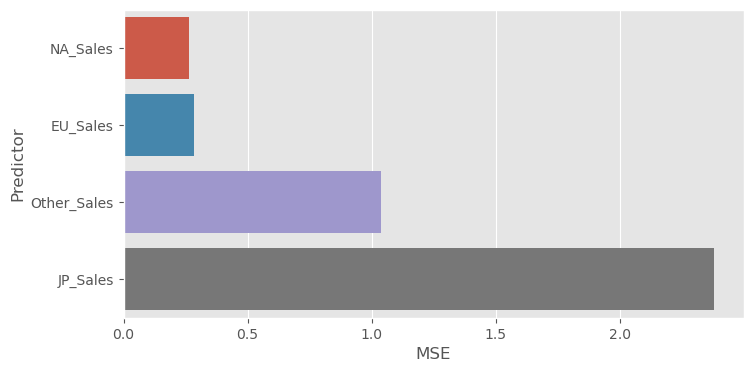

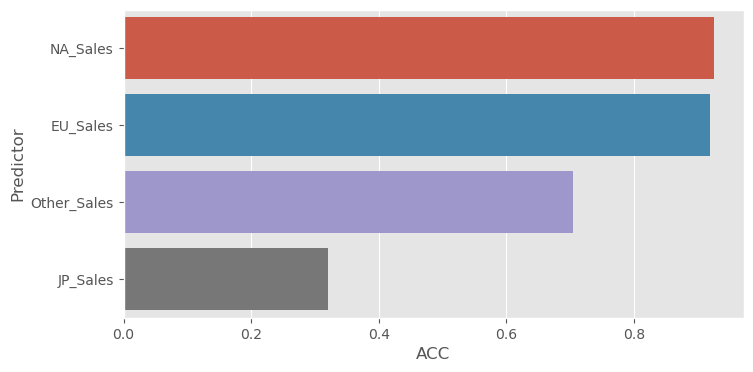

In [20]:
result_listx = []
result_listx.append(reg(cleaned_data,sales, "JP_Sales"))
result_listx.append(reg(cleaned_data,sales, "Other_Sales"))
result_listx.append(reg(cleaned_data,sales, "NA_Sales"))
result_listx.append(reg(cleaned_data,sales, "EU_Sales"))
acc_df = pd.DataFrame(result_listx, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)


Let's see if the model changes with some further cleaning.

Intercept of Regression 	: b =  [0.20280605]
Coefficients of Regression 	: a =  [[0.64048184]]

For predictor JP_Sales:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07227936753612663
Mean Squared Error (MSE) 	: 0.05366659182329607

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07614914595252986
Mean Squared Error (MSE) 	: 0.05482237261951716

Intercept of Regression 	: b =  [0.14132029]
Coefficients of Regression 	: a =  [[4.62143776]]

For predictor Other_Sales:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4511540901225053
Mean Squared Error (MSE) 	: 0.031749525006309544

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.44515896456568627
Mean Squared Error (MSE) 	: 0.03292490541727174

Intercept of Regression 	: b =  [0.08204602]
Coefficients of Regression 	: a =  [[1.27840682]]

For predictor NA_Sales:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6500695222600111
Mean

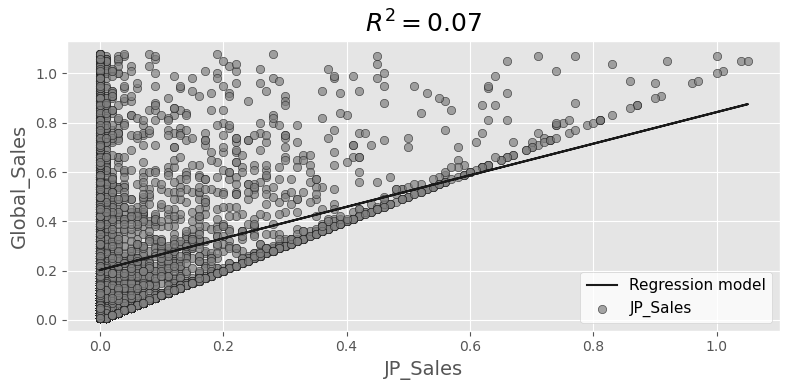

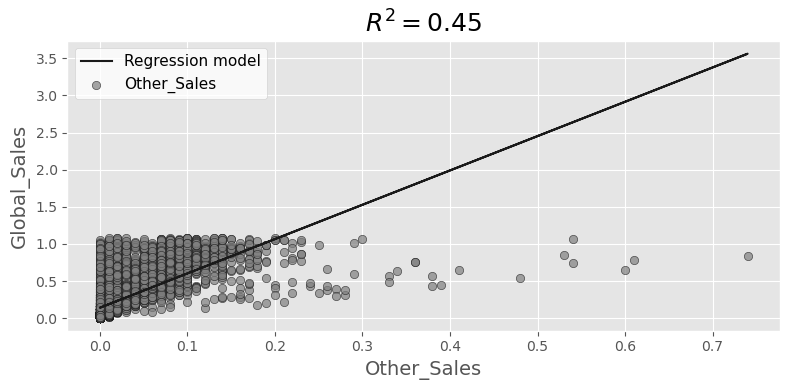

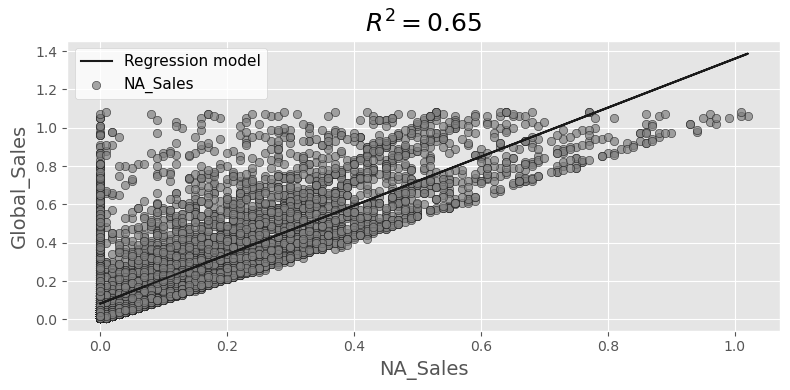

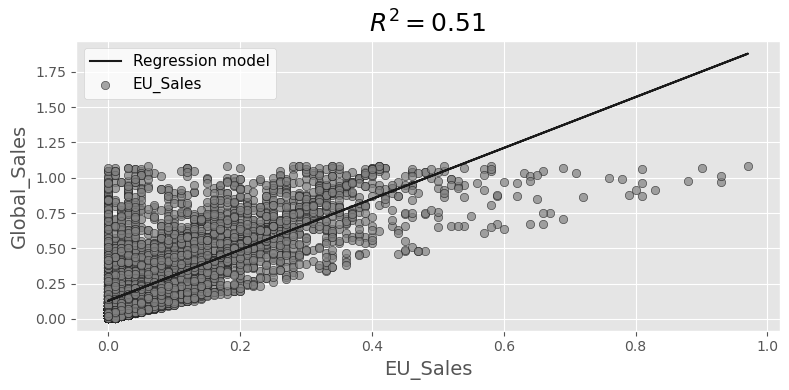

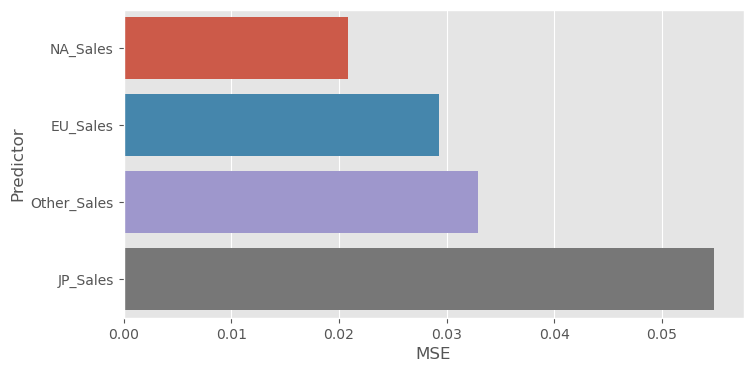

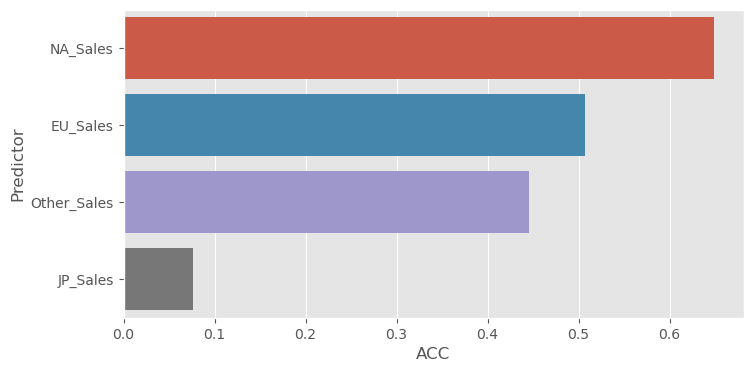

In [21]:
cleaned_data = null_cleaning(data, predictors)
cleaned_data = outlier_cleaning(cleaned_data, ["Global_Sales"])
sales = pd.DataFrame(cleaned_data["Global_Sales"])
result_listc = []
result_listc.append(reg(cleaned_data,sales, "JP_Sales"))
result_listc.append(reg(cleaned_data,sales, "Other_Sales"))
result_listc.append(reg(cleaned_data,sales, "NA_Sales"))
result_listc.append(reg(cleaned_data,sales, "EU_Sales"))
acc_df = pd.DataFrame(result_listc, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)

In either cases we can see that NA sales is the best at predicting global sales with EU sales close behind. and Interestingly, there is a significant decrease in the accuracy for JP sales after removing outliers, suggesting that Japan as region might have a different taste from other regions.

Lets try with another model(Gradient Boosting regressor) to see if the results improve

In [22]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

Cross validation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.67306990611092
Mean Squared Error (MSE) 	: 0.019400407922121093

Cross validation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5396220950016346
Mean Squared Error (MSE) 	: 0.027319354572265413

Cross validation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.11964056518270938
Mean Squared Error (MSE) 	: 0.05224154176316984

Cross validation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5941565548969541
Mean Squared Error (MSE) 	: 0.02408321697723354



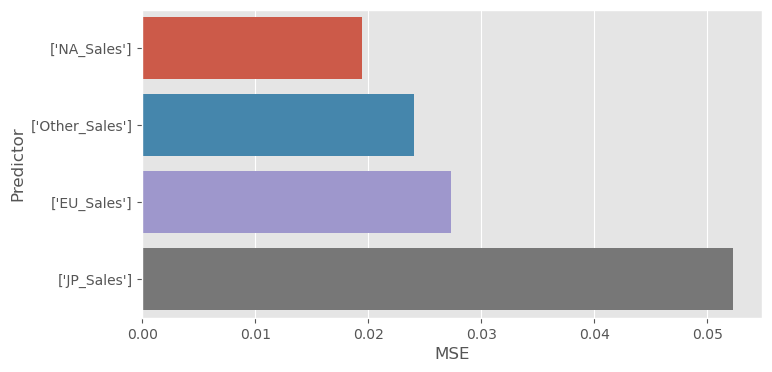

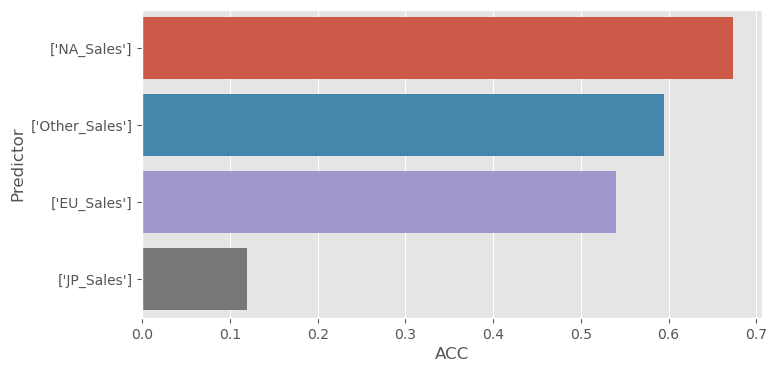

In [23]:
result_list = []
result_list.append(grad(cleaned_data, sales, ["NA_Sales"]))
result_list.append(grad(cleaned_data, sales, ["EU_Sales"]))
result_list.append(grad(cleaned_data, sales, ["JP_Sales"]))
result_list.append(grad(cleaned_data, sales, ["Other_Sales"]))

acc_df = pd.DataFrame(result_list, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')

fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)


# **2.Rating Scores**

Let see how good rating scores are at predicting global sales.

Initial Cleaning:

In [24]:
data["User_Score"] = data["User_Score"].replace("tbd", np.nan).astype(float)
cleaned_data = data
cleaning = ['Critic_Score','Critic_Count', 'User_Score', 'User_Count', 'Global_Sales', 'Rating']
cleaned_data = null_cleaning(data, cleaning)
print(cleaned_data.shape)


(6947, 16)


Basic Modelling

       Year_of_Release     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count      6826.000000  6947.000000  6947.000000  6947.000000  6947.000000   
mean       2007.437299     0.392840     0.234648     0.063236     0.082189   
std           4.211160     0.961157     0.682293     0.285257     0.267832   
min        1985.000000     0.000000     0.000000     0.000000     0.000000   
25%        2004.000000     0.060000     0.020000     0.000000     0.010000   
50%        2007.000000     0.150000     0.060000     0.000000     0.020000   
75%        2011.000000     0.390000     0.210000     0.010000     0.070000   
max        2016.000000    41.360000    28.960000     6.500000    10.570000   

       Global_Sales  Critic_Score  Critic_Count  User_Score    User_Count  
count   6947.000000   6947.000000   6947.000000  6947.00000   6947.000000  
mean       0.773098     70.263567     28.873615     7.18336    173.821362  
std        1.948883     13.888922     19.195731     1.44200    584.51

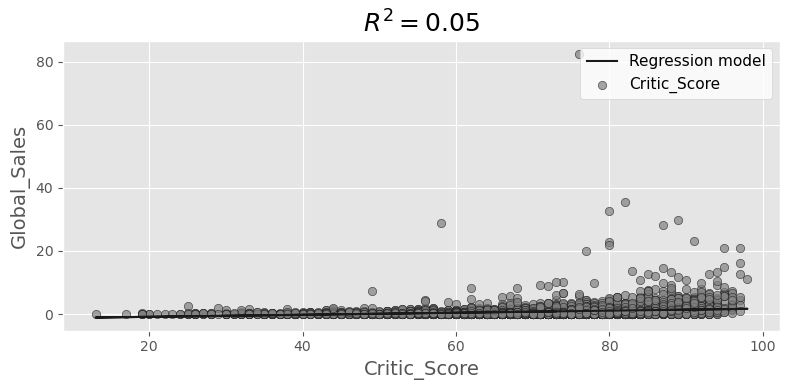

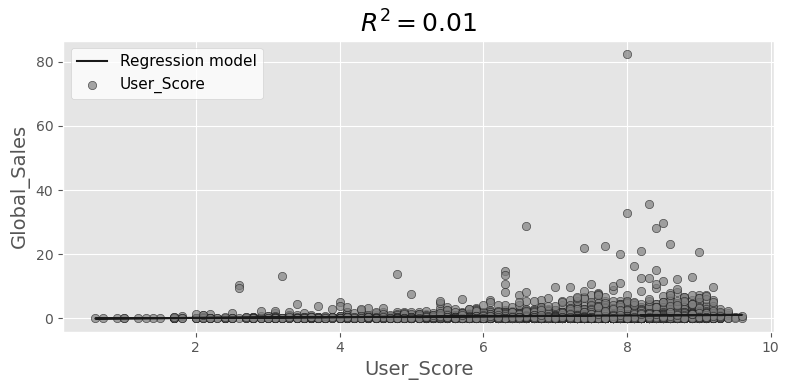

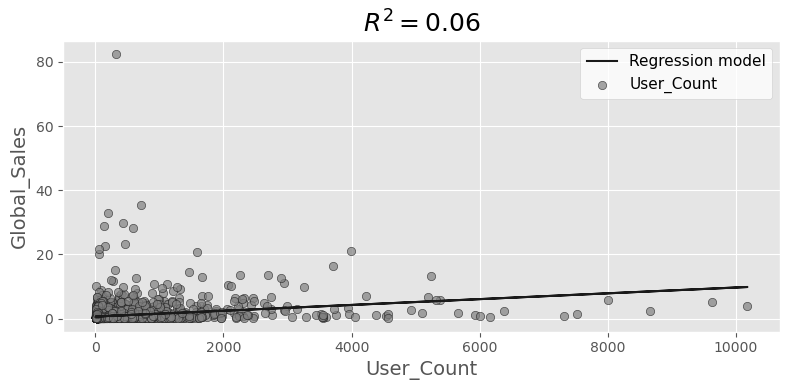

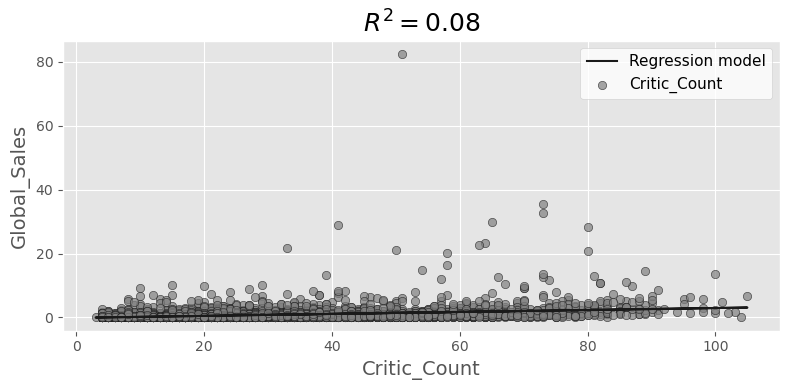

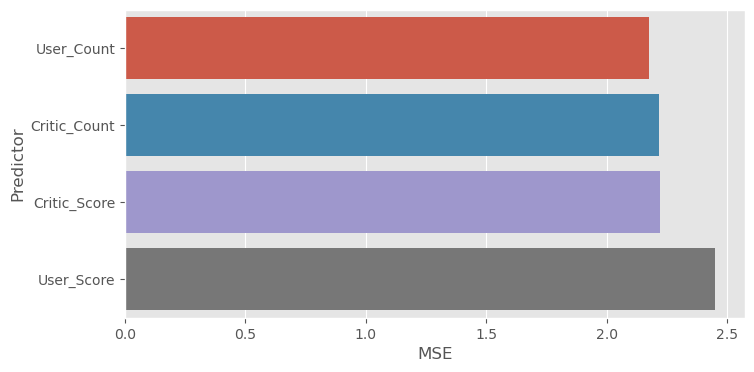

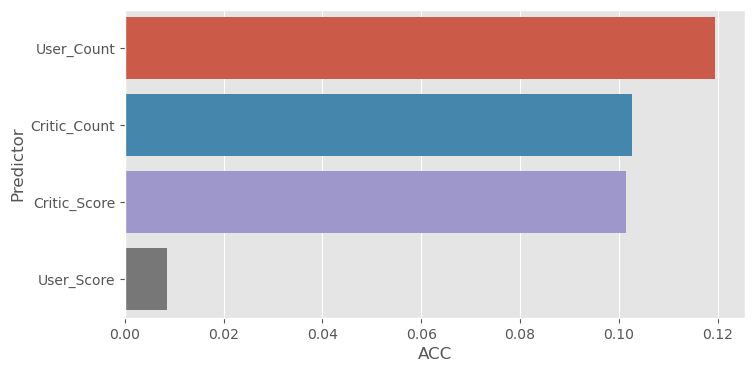

In [25]:
print(cleaned_data.describe())
sales = pd.DataFrame(cleaned_data["Global_Sales"])
predictors = cleaned_data[["Critic_Score", "User_Count", "Critic_Count", "User_Score"]]
correlations = cleaned_data.corr()["Global_Sales"].dropna().sort_values()

result_list = []
result_list.append(reg(predictors,sales, "Critic_Score"))
result_list.append(reg(predictors,sales, "User_Score"))
result_list.append(reg(predictors,sales, "User_Count"))
result_list.append(reg(predictors,sales, "Critic_Count"))
acc_df = pd.DataFrame(result_list, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)

Let's clean the data a bit to see if anything changes

Intercept of Regression 	: b =  [-0.06442262]
Coefficients of Regression 	: a =  [[0.00574246]]

For predictor Critic_Score:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06686800655803216
Mean Squared Error (MSE) 	: 0.08387232186258382

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.06170941440313116
Mean Squared Error (MSE) 	: 0.09385336176193515

Intercept of Regression 	: b =  [0.14276913]
Coefficients of Regression 	: a =  [[0.02523945]]

For predictor User_Score:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.015274433848606273
Mean Squared Error (MSE) 	: 0.08850968588689932

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.018872462979589
Mean Squared Error (MSE) 	: 0.09813816644872063

Intercept of Regression 	: b =  [0.26333295]
Coefficients of Regression 	: a =  [[0.00174858]]

For predictor User_Count:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0489233303892299

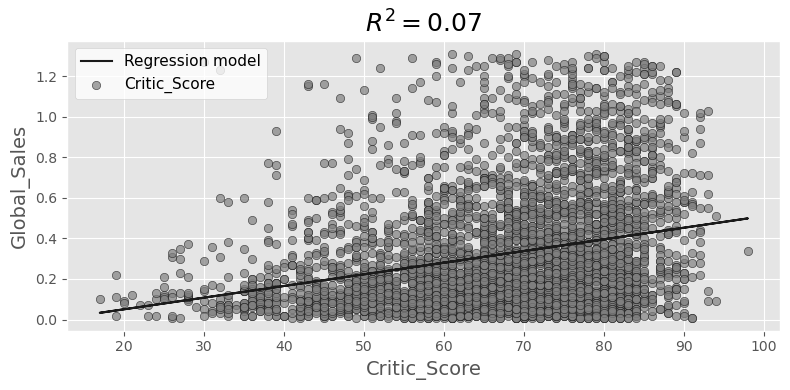

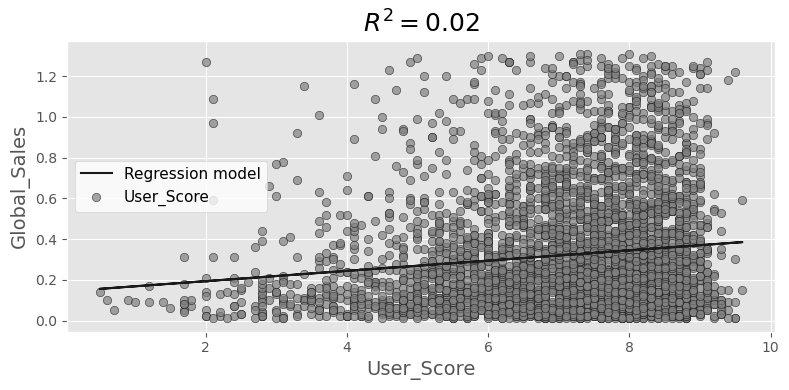

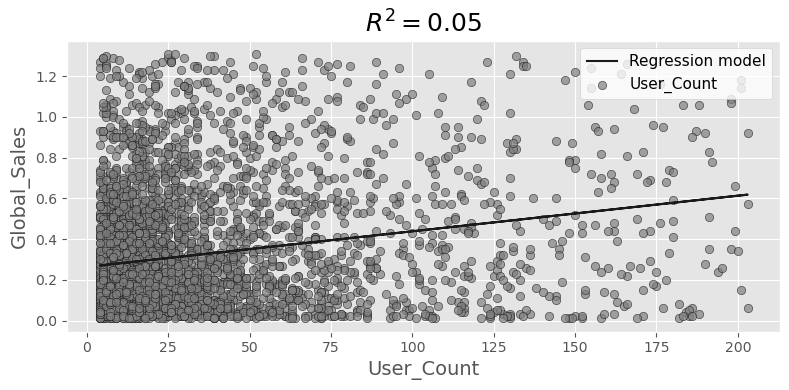

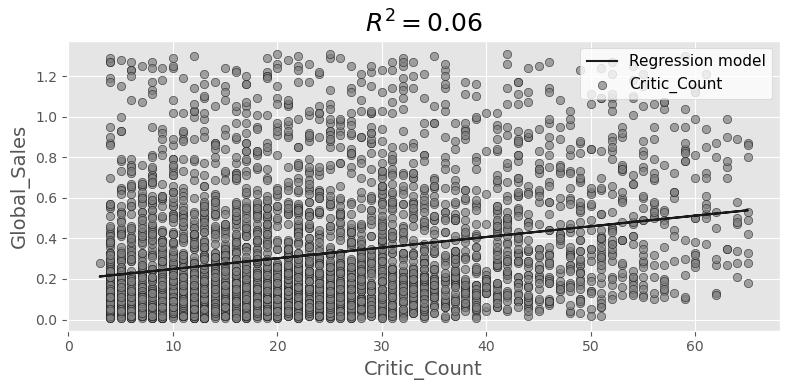

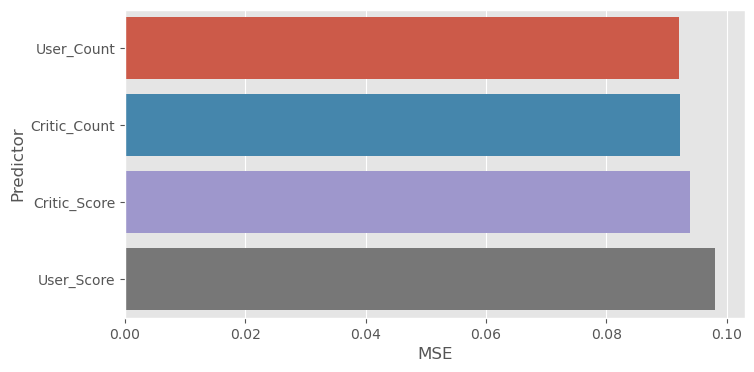

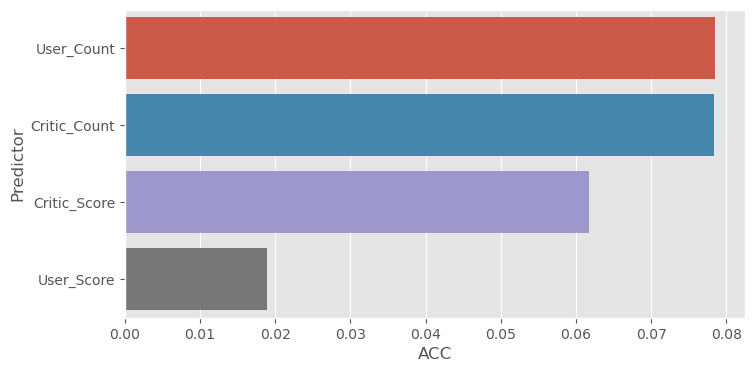

In [26]:
cleaned_data = outlier_cleaning(cleaned_data, ["User_Count", "Critic_Count",  "Global_Sales"])
sales = pd.DataFrame(cleaned_data["Global_Sales"])
predictors = cleaned_data[["Critic_Score", "User_Count", "Critic_Count", "User_Score"]]
correlations = cleaned_data.corr()["Global_Sales"].dropna().sort_values()

result_list = []
result_list.append(reg(predictors,sales, "Critic_Score"))
result_list.append(reg(predictors,sales, "User_Score"))
result_list.append(reg(predictors,sales, "User_Count"))
result_list.append(reg(predictors,sales, "Critic_Count"))
acc_df = pd.DataFrame(result_list, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)


As expected rating scores is not good at predicting global sales

# **3. Genre**

Let's see if this catergorical variable can give any insights

Initial cleaning

In [27]:
predictors = ["JP_Sales", "NA_Sales", "EU_Sales", "Other_Sales", "Global_Sales","Genre"]
cleaned_data = null_cleaning(data, predictors)
print(cleaned_data["Genre"].value_counts())
sales = pd.DataFrame(cleaned_data["Global_Sales"])

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64


Ordinal Encoder to convert our Genre into numerical values

In [28]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
cleaned_data["Genre_Converted"] = ord_enc.fit_transform(cleaned_data[["Genre"]])

Lets try a normal regression model on this

Intercept of Regression 	: b =  [0.48719179]
Coefficients of Regression 	: a =  [[0.00840679]]

For predictor Genre_Converted:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0004921908843896761
Mean Squared Error (MSE) 	: 2.026610802488793

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0005685815464183674
Mean Squared Error (MSE) 	: 3.498686801086995



['Genre_Converted', 0.0005685815464183674, 3.498686801086995]

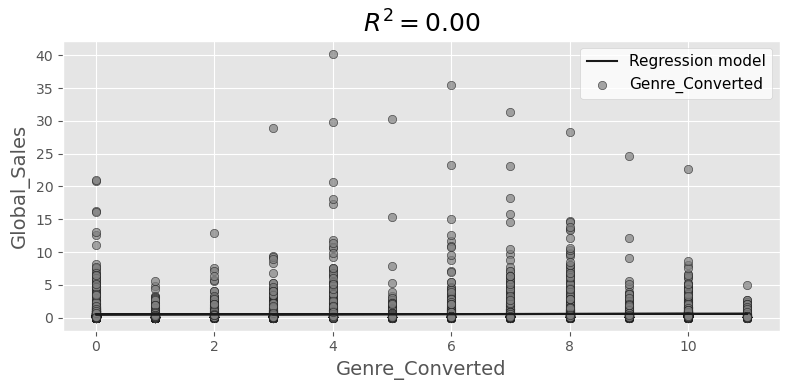

In [29]:
reg(cleaned_data,sales,"Genre_Converted")

Not very ideal. Lets try it with the KNeightborsRegressor model

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
knn = KNeighborsRegressor(n_neighbors=10)
fit_and_eval(cleaned_data, 'Genre_Converted', 'Global_Sales', knn)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -0.007602342329425804
Mean Squared Error (MSE) 	: 2.0430233490468215


Even worse results.

# **4. Region Sales and Genre**

Intercept of Regression 	: b =  [0.0683999]
Coefficients of Regression 	: a =  [[1.7188414  0.00231842]]

For predictor ['NA_Sales', 'Genre_Converted']:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8604812950304785
Mean Squared Error (MSE) 	: 0.28288935019993844

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9251892840222957
Mean Squared Error (MSE) 	: 0.26188816935138054

Intercept of Regression 	: b =  [0.1208603]
Coefficients of Regression 	: a =  [[2.75533668 0.00306893]]

For predictor ['EU_Sales', 'Genre_Converted']:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7517426801098726
Mean Squared Error (MSE) 	: 0.5033687197816116

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9173334808000595
Mean Squared Error (MSE) 	: 0.2893888007484823

Intercept of Regression 	: b =  [0.29498539]
Coefficients of Regression 	: a =  [[2.90140413e+00 1.62673787e-03]]

For predictor ['JP_Sales', 'Genre_Conve

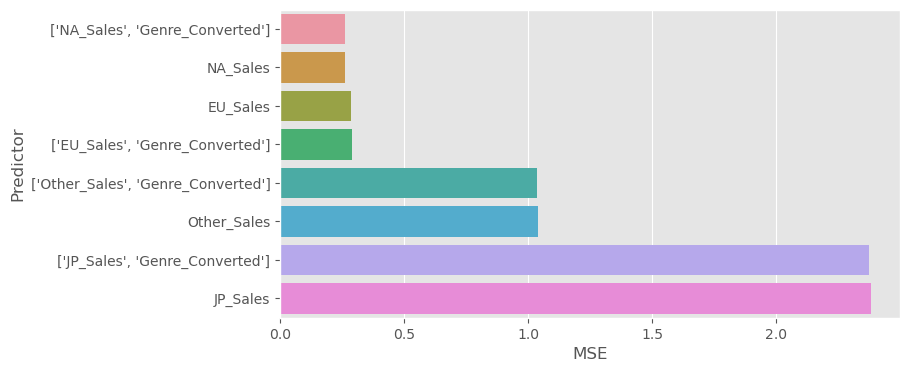

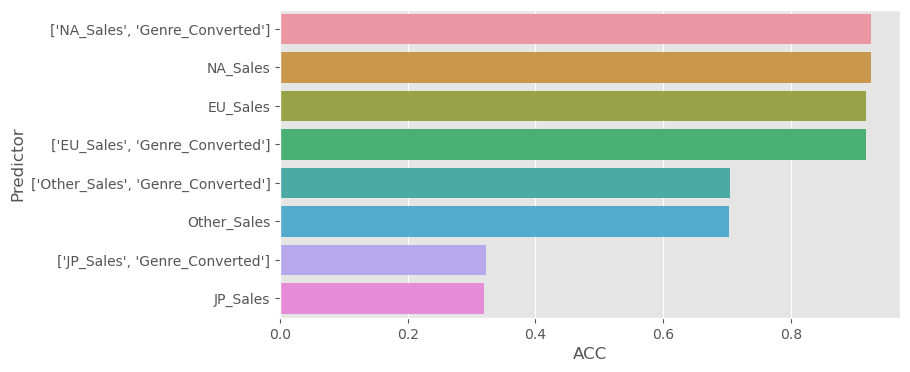

In [32]:

result_listx.append(reg(cleaned_data,sales, ["NA_Sales", "Genre_Converted"]))

result_listx.append(reg(cleaned_data,sales, ["EU_Sales", "Genre_Converted"]))

result_listx.append(reg(cleaned_data,sales, ["JP_Sales", "Genre_Converted"]))

result_listx.append(reg(cleaned_data,sales, ["Other_Sales", "Genre_Converted"]))

acc_df = pd.DataFrame(result_listx, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')

fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)

Intercept of Regression 	: b =  [0.07490419]
Coefficients of Regression 	: a =  [[1.2769364  0.00150367]]

For predictor ['NA_Sales', 'Genre_Converted']:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6506833674066992
Mean Squared Error (MSE) 	: 0.02020910712252112

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6485150739327187
Mean Squared Error (MSE) 	: 0.020853430393573326

Intercept of Regression 	: b =  [0.11752519]
Coefficients of Regression 	: a =  [[1.80085305 0.00229062]]

For predictor ['EU_Sales', 'Genre_Converted']:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5106162260661262
Mean Squared Error (MSE) 	: 0.028312448330990194

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.507839494267652
Mean Squared Error (MSE) 	: 0.029199644387568346

Intercept of Regression 	: b =  [0.18979219]
Coefficients of Regression 	: a =  [[0.63567818 0.00270628]]

For predictor ['JP_Sales', 'Genre_Convert

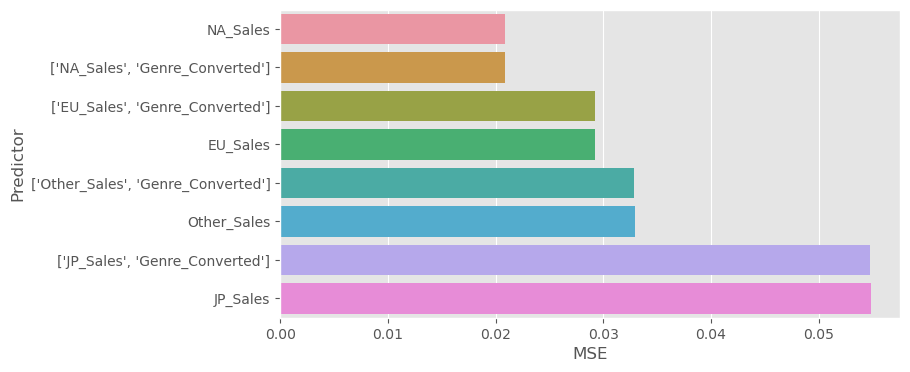

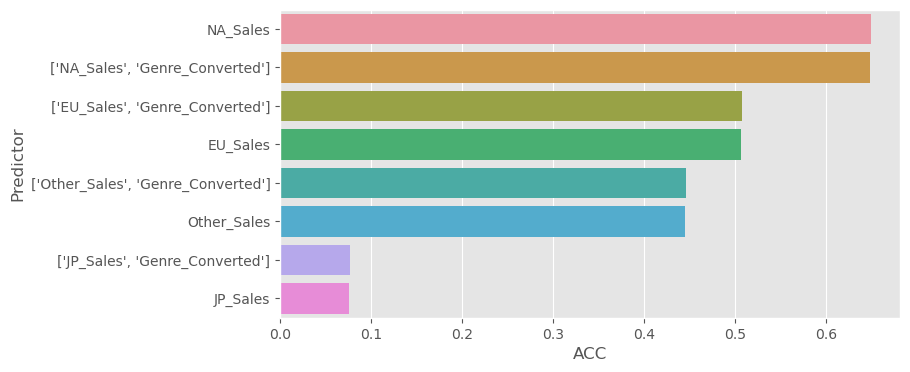

In [33]:
cleaned_data = outlier_cleaning(cleaned_data, ["Global_Sales"])
cleaned_data["Genre_Converted"] = ord_enc.fit_transform(cleaned_data[["Genre"]])
sales = pd.DataFrame(cleaned_data["Global_Sales"])

result_listc.append(reg(cleaned_data,sales, ["NA_Sales", "Genre_Converted"]))

result_listc.append(reg(cleaned_data,sales, ["EU_Sales", "Genre_Converted"]))

result_listc.append(reg(cleaned_data,sales, ["JP_Sales", "Genre_Converted"]))

result_listc.append(reg(cleaned_data,sales, ["Other_Sales", "Genre_Converted"]))

acc_df = pd.DataFrame(result_listc, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')

fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)

Using a different model(gradient boosting)

Cross validation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6854608718757412
Mean Squared Error (MSE) 	: 0.018661454099283065

Cross validation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5522295958041514
Mean Squared Error (MSE) 	: 0.026566001167324393

Cross validation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1520430773802881
Mean Squared Error (MSE) 	: 0.05030887344287976

Cross validation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\wenyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6000608476776172
Mean Squared Error (MSE) 	: 0.0237281961645862



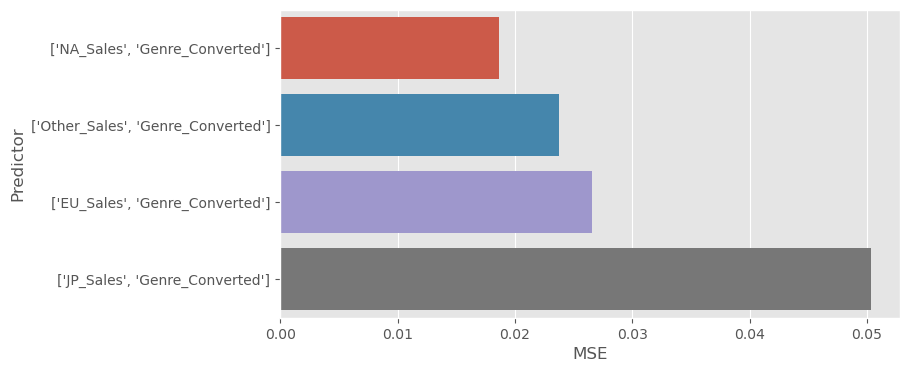

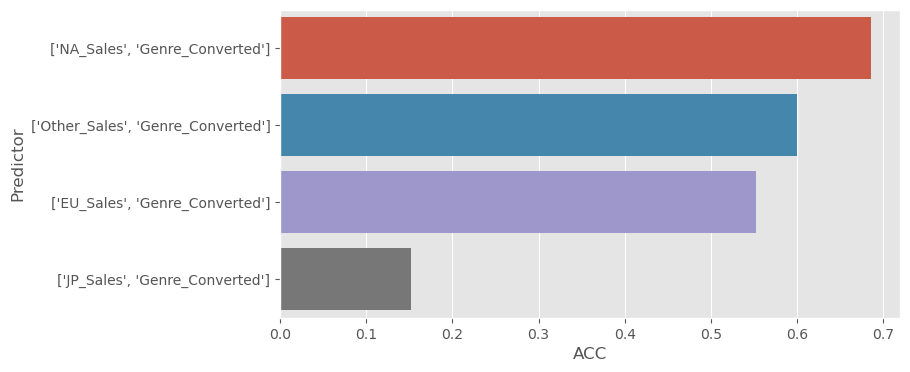

In [34]:
result_list = []
result_list.append(grad(cleaned_data, sales, ["NA_Sales", "Genre_Converted"]))
result_list.append(grad(cleaned_data, sales, ["EU_Sales", "Genre_Converted"]))
result_list.append(grad(cleaned_data, sales, ["JP_Sales", "Genre_Converted"]))
result_list.append(grad(cleaned_data, sales, ["Other_Sales", "Genre_Converted"]))

acc_df = pd.DataFrame(result_list, columns=["Predictor","ACC","MSE"]).sort_values(by='MSE')

fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="MSE", y="Predictor", data=acc_df)
fig, ax = plt.subplots(figsize=(8, 4))
ax = sb.barplot(x="ACC", y="Predictor", data=acc_df)


# **Conclusion**

We realised that the variables in the dataset were not enough to predict Global sales, as there are many other factors that could affect how popular and successful a game can be. 

Take Wii sports for example, which was an innovative game that implemented real life action into video games to simulate playing the real sport. Wii sport’s success could be attributed to its innovation to not imitate other existing games, but rather create a game that was never seen before. As such, factors like creativity, constant developer updates, beta testing and such could result in a more successful game and consequently higher sales. 

With that in mind, perhaps there is more to creating a high-selling video game than just the platforms, publishers, genres and such. Instead, its success is also attributed together with the mindset of the developers to ensure the game stays relevant and innovative. 
